In [143]:
import Vision
import Quartz
from Cocoa import NSURL
from Foundation import NSDictionary
from wurlitzer import pipes
import cv2

In [255]:
def face_detection(img_pth: str):
    input_url = NSURL.fileURLWithPath_(img_pth)

    cv_img = cv2.imread(img_pth)
    height, width, channels = cv_img.shape

    print(f"height of img :- {height} \nwidth of image:- {width} \n\n")
    with pipes() as (out, err):
        input_image = Quartz.CIImage.imageWithContentsOfURL_(input_url)
    
    # specify min confidence
    vision_options = NSDictionary.dictionaryWithDictionary_({"minimumConfidence": 0.6})

    # create a image request handler
    vision_handler = Vision.VNImageRequestHandler.alloc().initWithCIImage_options_(
        input_image, vision_options
    )
    
    results = []

    handler = make_request_handler(results, width, height)
    vision_request = Vision.VNDetectFaceRectanglesRequest.alloc().initWithCompletionHandler_(handler)
    
    # print(f"Vision Request :- {vision_request}")
    error = vision_handler.performRequests_error_([vision_request], None)
    print(f"Results:- {results} \n")

    return results


def make_request_handler(results, width, height):
    if not isinstance(results, list):
        raise ValueError("results must be list")
    
    denorm = Vision.VNImageRectForNormalizedRect

    def handler(request, error):
        if error:
            print(f"Error:- {error}")
        else:
            observations = request.results()

            for obj in observations:
                print(f"Obj :- {obj}")
                rect=obj.boundingBox()
                confidence = obj.confidence()

                denorm_rect = denorm(rect, height, width)

                print(f'Rect:- {rect}')

                x = rect.origin.x
                w = rect.size.width
                h = rect.size.height
                y = rect.origin.y
                
                x_denorm = denorm_rect.origin.x
                w_denorm = denorm_rect.size.width
                h_denorm = denorm_rect.size.height
                y_denorm = denorm_rect.origin.y
                

                print(f"X coord :- {x}")
                print(f"Y coord :- {y}")
                print(f"W coord :- {w}")
                print(f"H coord :- {h}")
                
                print(f"Conf:- {confidence}")

                results.append([{"normalized":[x, y, w, h],"conf": confidence, "denorm_vision": [x_denorm, y_denorm, w_denorm, h_denorm]}])
                # let w=rect.width*final_image.size.width
                # let h=rect.height*final_image.size.height
                # let y=final_image.size.height*(1-rect.origin.y)-h
                # results.append(list(obj))

    return handler

In [256]:
img_url = "/Users/harish/Desktop/Aftershoot_Experiments/Albums/AnthonyChristinaJPegs/DSC_0081.jpg"
result = face_detection(img_url)

height of img :- 4016 
width of image:- 6016 


Obj :- <VNFaceObservation: 0x7fc238663b10> BBDF6137-5E6B-4421-8FCB-CDE27ED98189 VNDetectFaceRectanglesRequestRevision3 confidence=0.821168 boundingBox=[0.710461, 0.638023, 0.04841, 0.0725185]
Rect:- <CoreFoundation.CGRect origin=<CoreFoundation.CGPoint x=0.710460901260376 y=0.6380228400230408> size=<CoreFoundation.CGSize width=0.04840996488928795 height=0.07251851260662079>>
X coord :- 0.710460901260376
Y coord :- 0.6380228400230408
W coord :- 0.04840996488928795
H coord :- 0.07251851260662079
Conf:- 0.8211677074432373
Obj :- <VNFaceObservation: 0x7fc261a5ddd0> 2937282D-1855-4233-96D8-03DD23360AF6 VNDetectFaceRectanglesRequestRevision3 confidence=0.775605 boundingBox=[0.284945, 0.664229, 0.0498947, 0.0747426]
Rect:- <CoreFoundation.CGRect origin=<CoreFoundation.CGPoint x=0.2849452495574951 y=0.6642290353775024> size=<CoreFoundation.CGSize width=0.04989468306303024 height=0.0747426301240921>>
X coord :- 0.2849452495574951
Y coord :- 0.6642

In [356]:
result

[{'normalized': [0.710460901260376,
   0.6380228400230408,
   0.04840996488928795,
   0.07251851260662079],
  'conf': 0.8211677074432373,
  'denorm_vision': [2853.21097946167,
   3838.3454055786133,
   194.4144189953804,
   436.27137184143066]}]

In [304]:
import matplotlib.pyplot as plt

img = cv2.imread(img_url)
h, w, _ = img.shape

# plt.imshow(cv2.cvtColor(cv2.resize(img, (500, 500)), cv2.COLOR_BGR2RGB))

In [305]:
# cv2.rectangle(img, (result[0][0]*))

In [306]:
test = result[0][0]["normalized"]
test

[0.710460901260376,
 0.6380228400230408,
 0.04840996488928795,
 0.07251851260662079]

In [307]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255

In [308]:
bbox = [int(x) for x in test]

In [309]:
cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2],bbox[1] + bbox[3]), (255, 255, 0), 100)

array([[[2.55000000e+02, 2.55000000e+02, 0.00000000e+00],
        [2.55000000e+02, 2.55000000e+02, 0.00000000e+00],
        [2.55000000e+02, 2.55000000e+02, 0.00000000e+00],
        ...,
        [8.70588235e-01, 8.74509804e-01, 8.94117647e-01],
        [8.70588235e-01, 8.74509804e-01, 8.94117647e-01],
        [8.70588235e-01, 8.74509804e-01, 8.94117647e-01]],

       [[2.55000000e+02, 2.55000000e+02, 0.00000000e+00],
        [2.55000000e+02, 2.55000000e+02, 0.00000000e+00],
        [2.55000000e+02, 2.55000000e+02, 0.00000000e+00],
        ...,
        [8.66666667e-01, 8.70588235e-01, 8.90196078e-01],
        [8.66666667e-01, 8.70588235e-01, 8.90196078e-01],
        [8.66666667e-01, 8.70588235e-01, 8.90196078e-01]],

       [[2.55000000e+02, 2.55000000e+02, 0.00000000e+00],
        [2.55000000e+02, 2.55000000e+02, 0.00000000e+00],
        [2.55000000e+02, 2.55000000e+02, 0.00000000e+00],
        ...,
        [8.62745098e-01, 8.66666667e-01, 8.86274510e-01],
        [8.62745098e-01, 8.66

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


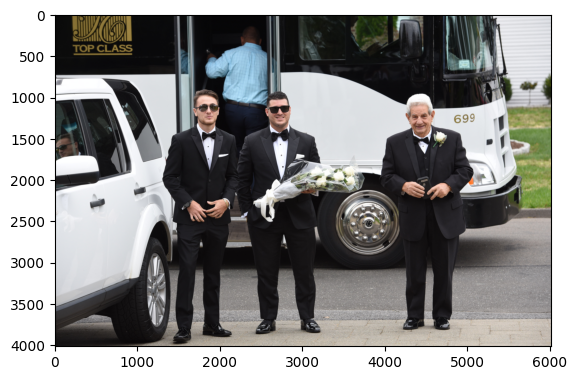

In [310]:
plt.imshow(img)
plt.show()

In [349]:
import matplotlib.pyplot as plt

img = cv2.imread(img_url)
h, w, _ = img.shape

# plt.imshow(cv2.cvtColor(cv2.resize(img, (500, 500)), cv2.COLOR_BGR2RGB))

In [353]:
bbox = int(test[0]*w), int((1 - test[1])*h - (test[3]*h)), int(test[2]*w), int(test[3]*h)

# bbox = int(test[0]*h), int((1 - test[1])*w), int(test[2]*w), int(test[3]*h)

In [354]:
cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2],bbox[1] + bbox[3]), (255, 255, 0), 30)

array([[[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [228, 223, 222],
        [228, 223, 222],
        [228, 223, 222]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [227, 222, 221],
        [227, 222, 221],
        [227, 222, 221]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [226, 221, 220],
        [226, 221, 220],
        [226, 221, 220]],

       ...,

       [[ 20,  22,  23],
        [ 20,  22,  23],
        [ 20,  22,  23],
        ...,
        [166, 176, 183],
        [164, 176, 182],
        [158, 170, 176]],

       [[ 20,  22,  23],
        [ 20,  22,  23],
        [ 20,  22,  23],
        ...,
        [165, 175, 182],
        [169, 181, 187],
        [164, 176, 182]],

       [[ 20,  22,  23],
        [ 20,  22,  23],
        [ 20,  22,  23],
        ...,
        [170, 180, 187],
        [180, 192, 198],
        [179, 191, 197]]

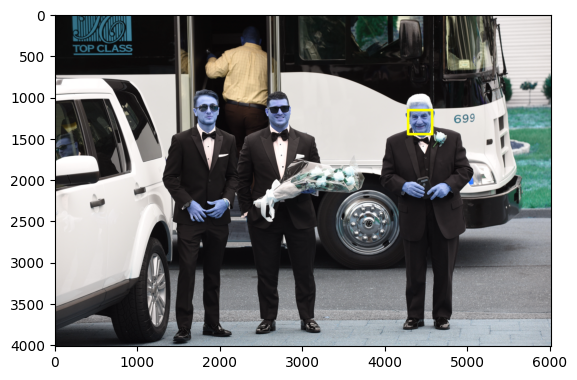

In [355]:
plt.imshow(img)
plt.show()

## plot all bbox

In [1]:
import Vision
import Quartz
from Cocoa import NSURL
from Foundation import NSDictionary
from wurlitzer import pipes
import cv2

In [2]:
def face_detection(img_pth: str):
    input_url = NSURL.fileURLWithPath_(img_pth)

    cv_img = cv2.imread(img_pth)
    height, width, channels = cv_img.shape

    # print(f"height of img :- {height} \nwidth of image:- {width} \n\n")
    with pipes() as (out, err):
        input_image = Quartz.CIImage.imageWithContentsOfURL_(input_url)
    
    # specify min confidence
    vision_options = NSDictionary.dictionaryWithDictionary_({"minimumConfidence": 0.3})

    # create a image request handler
    vision_handler = Vision.VNImageRequestHandler.alloc().initWithCIImage_options_(
        input_image, vision_options
    )
    
    results = []

    handler = make_request_handler(results, width, height)
    vision_request = Vision.VNDetectFaceRectanglesRequest.alloc().initWithCompletionHandler_(handler)
    
    # print(f"Vision Request :- {vision_request}")
    error = vision_handler.performRequests_error_([vision_request], None)
    
    return results


def make_request_handler(results, width, height):
    if not isinstance(results, list):
        raise ValueError("results must be list")
    
    denorm = Vision.VNImageRectForNormalizedRect

    def handler(request, error):
        if error:
            print(f"Error:- {error}")
        else:
            observations = request.results()

            for obj in observations:
                rect=obj.boundingBox()
                confidence = obj.confidence()

                denorm_rect = denorm(rect, height, width)

                x = rect.origin.x
                w = rect.size.width
                h = rect.size.height
                y = rect.origin.y
                
                x_denorm = denorm_rect.origin.x
                w_denorm = denorm_rect.size.width
                h_denorm = denorm_rect.size.height
                y_denorm = denorm_rect.origin.y
                

                results.append([{"normalized":[x, y, w, h],"conf": confidence, "denorm_vision": [x_denorm, y_denorm, w_denorm, h_denorm]}])
                
    return handler

In [3]:
img_url = "/Users/harish/Desktop/Aftershoot_Experiments/Albums/AnthonyChristinaJPegs/DSC_0081.jpg"
img_url = "/Users/harish/Desktop/face_small_issue_jpegs/1DX_7439.jpg"
result = face_detection(img_url)

In [4]:
import matplotlib.pyplot as plt

img = cv2.imread(img_url)
h, w, _ = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.imshow(cv2.cvtColor(cv2.resize(img, (500, 500)), cv2.COLOR_BGR2RGB))



for res in result:
    print(res[0])
    test = res[0]['normalized']
    bbox = int(test[0]*w), int((1 - test[1])*h - (test[3]*h)), int(test[2]*w), int(test[3]*h)
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2],bbox[1] + bbox[3]), (255, 255, 0), 30)
    
    print(test)

{'normalized': [0.9187385439872742, 0.5518260598182678, 0.027409935370087624, 0.05824390798807144], 'conf': 0.6517704129219055, 'denorm_vision': [1426.8009588122368, 1821.0259974002838, 42.56762962974608, 192.20489636063576]}
[0.9187385439872742, 0.5518260598182678, 0.027409935370087624, 0.05824390798807144]


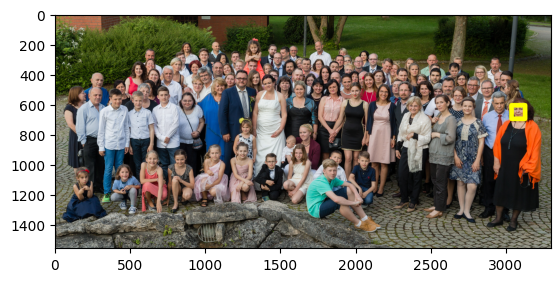

In [5]:
plt.imshow(img)

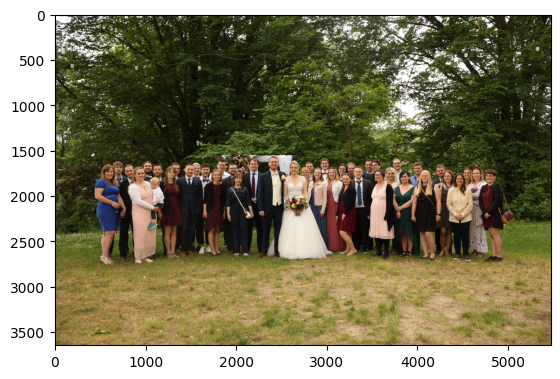

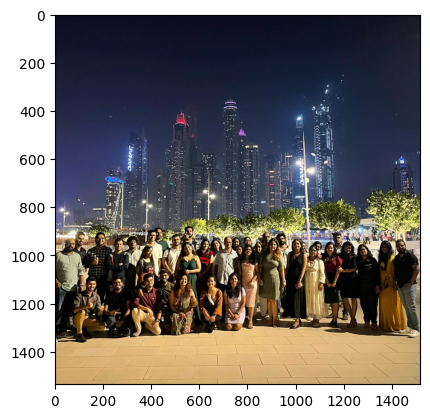

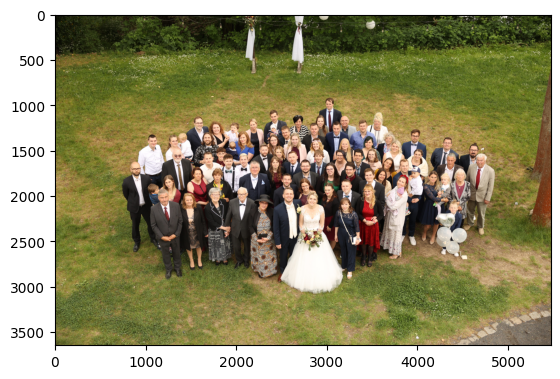

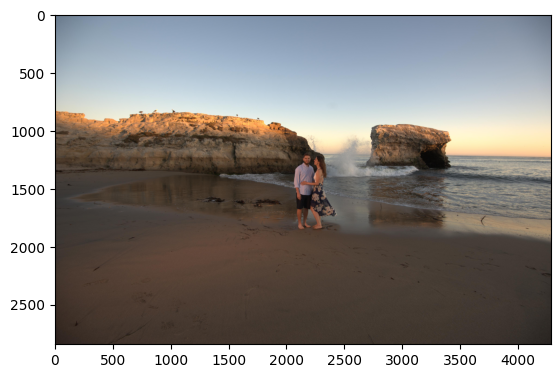

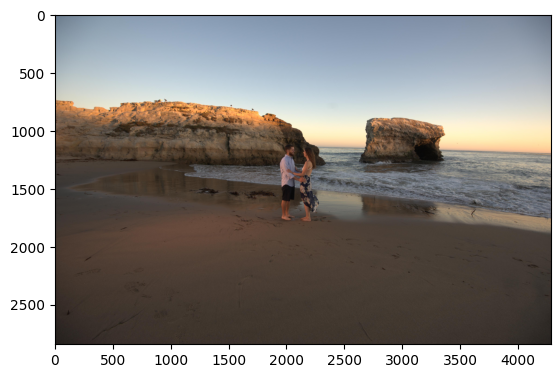

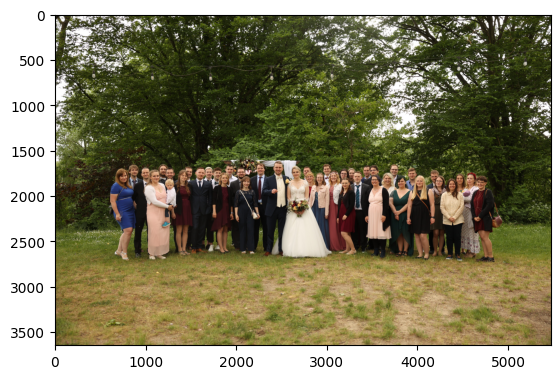

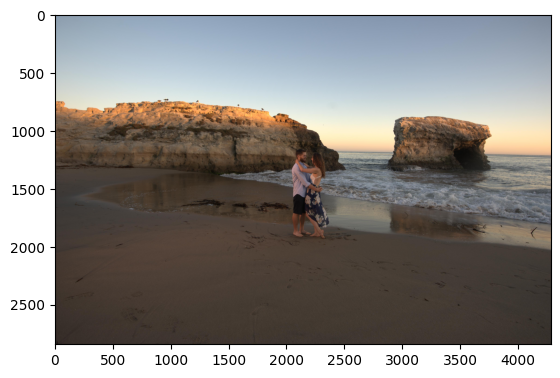

{'normalized': [0.9187385439872742, 0.5518260598182678, 0.027409935370087624, 0.05824390798807144], 'conf': 0.6517704129219055, 'denorm_vision': [1426.8009588122368, 1821.0259974002838, 42.56762962974608, 192.20489636063576]}
[0.9187385439872742, 0.5518260598182678, 0.027409935370087624, 0.05824390798807144]


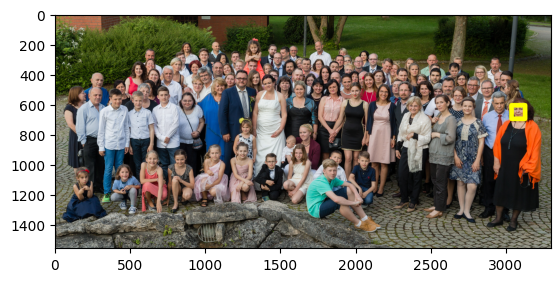

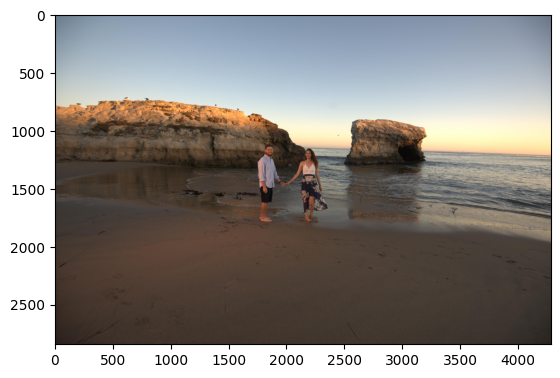

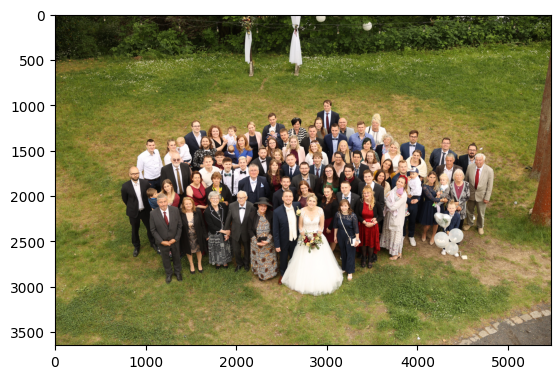

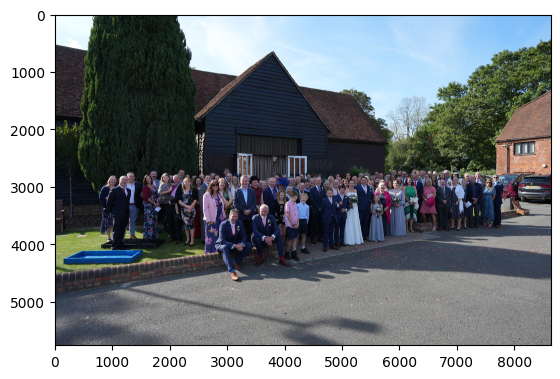

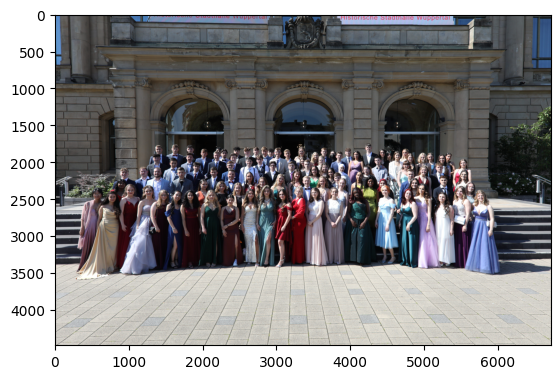

In [7]:
from glob import glob


for files in glob("/Users/harish/Desktop/face_small_issue_jpegs/*.jpg"):
    result = face_detection(files)
    img = cv2.imread(files)
    h, w, _ = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # plt.imshow(cv2.cvtColor(cv2.resize(img, (500, 500)), cv2.COLOR_BGR2RGB))



    for res in result:
        print(res[0])
        test = res[0]['normalized']
        bbox = int(test[0]*w), int((1 - test[1])*h - (test[3]*h)), int(test[2]*w), int(test[3]*h)
        cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2],bbox[1] + bbox[3]), (255, 255, 0), 30)
        
        print(test)
    
    plt.imshow(img)
    plt.show()
    

In [12]:
img_pth = "/Users/harish/Desktop/GHOST FACES/*.jpg"

img_pth = "/Users/harish/Desktop/Archive/*.jpg"


from glob import glob
from tqdm import tqdm
from datetime import datetime


st = datetime.now()
for files in tqdm(glob(img_pth)*500):
    result = face_detection(files)
    img = cv2.imread(files)
    h, w, _ = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # plt.imshow(cv2.cvtColor(cv2.resize(img, (500, 500)), cv2.COLOR_BGR2RGB))



    for res in result:
        # print(res[0])
        test = res[0]['normalized']
        bbox = int(test[0]*w), int((1 - test[1])*h - (test[3]*h)), int(test[2]*w), int(test[3]*h)
        cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2],bbox[1] + bbox[3]), (255, 255, 0), 30)
        
        # print(test)
    
    # plt.imshow(img)
    # plt.show()

print(datetime.now() - st)

100%|██████████| 10000/10000 [1:28:54<00:00,  1.87it/s]

1:28:54.297085
